 k-NN is a supervised learning Algorithm

In [51]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [29]:
df = pd.read_csv('Classified Data',index_col=0)
df.head() # unknown features 

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [30]:
#featurn scalling# Standardize the Variables
# scale matters 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [31]:
import sklearn

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
# compute mean and std for later scalling use 
scaler.fit(df.drop(labels=['TARGET CLASS'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
scaler_feature = scaler.transform(df.drop(labels=['TARGET CLASS'],axis=1))

In [36]:
scaler_feature

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [37]:
df_feat = pd.DataFrame(data=scaler_feature , columns=df.columns[:-1])

In [38]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train and test

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
X= df_feat
y=df['TARGET CLASS']

In [122]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=101)

# Using knn 

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
knn = KNeighborsClassifier(n_neighbors=1)

In [125]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [126]:
predict = knn.predict(X_test)

# Evaluation 

In [127]:
from sklearn.metrics import classification_report,confusion_matrix

In [128]:
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[151   8]
 [ 15 126]]


# check best value of k  

In [133]:
error_rate =[]
best=1;
p=100000;
for k in range(1,500):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    predict = knn.predict(X_test);
    error_rate.append(np.mean(predict!=y_test));
    if(np.mean(predict!=y_test)<p):
        best =k
        
print(best)
    
    
    

499


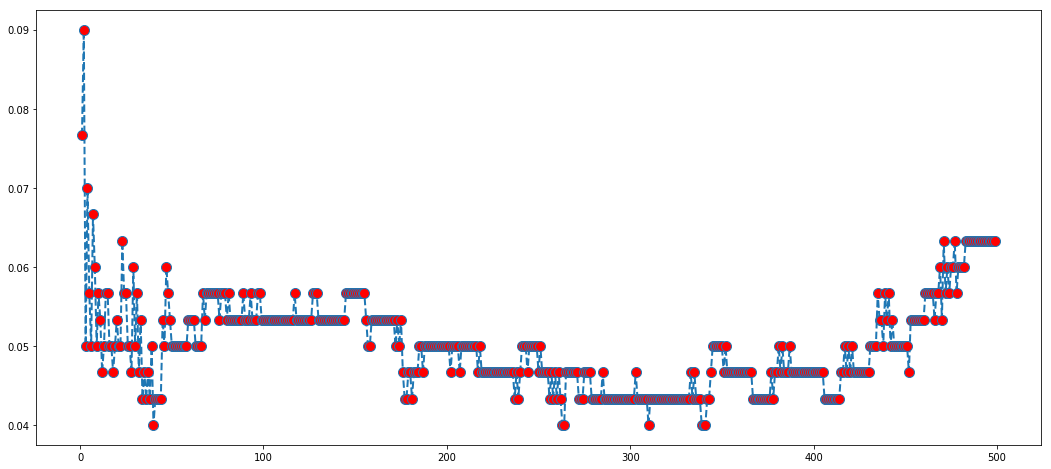

In [135]:
plt.figure(figsize=(18,8))

plt.plot(range(1,500),error_rate, lw=2, marker='o',ls='dashed',mfc='red',ms=10)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train,y_train)
predict = knn.predict(X_test);


In [ ]:
print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))